<a href="https://colab.research.google.com/github/Mario-RJunior/calculadora-imoveis/blob/master/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória dos Dados

In [1]:
# Importanto as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Recuperando o link da base de dados gerada no estudo de web scraping
LINK = 'https://raw.githubusercontent.com/Mario-RJunior/web-scraping-ML/master/dados_imoveis.csv'

In [5]:
# Gerando o dataframe
df = pd.read_csv(LINK)
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,zona,quartos,area,preco
0,norte,1.0,40,1.120
1,norte,2.0,47,1.414
2,norte,2.0,47,1.310
3,norte,2.0,51,1.123
4,norte,3.0,62,1.480


In [7]:
# Verificando dados estatísticos
df.describe()

,quartos,area,preco
count,1150.000000,1152.000000,1152.000000
mean,1.971304,83.239583,56.283334
std,0.785006,69.006817,204.404702
min,1.000000,12.000000,1.000000
25%,1.000000,48.000000,1.500000
50%,2.000000,62.000000,2.100000
75%,2.000000,90.000000,3.500000
max,5.000000,620.000000,995.000000


In [8]:
# Verificando valores nulos
df.isna().sum()

zona       0
quartos    2
area       0
preco      0
dtype: int64

In [12]:
# Verificando os tipos das variáveis
df.dtypes

zona        object
quartos    float64
area         int64
preco      float64
dtype: object

In [22]:
# Verificando a correlação
df.corr()

,quartos,area,preco
quartos,1.000000,0.666223,-0.238665
area,0.666223,1.000000,-0.148184
preco,-0.238665,-0.148184,1.000000


Podemos agora fazer alguns gráficos para entendermos os dados

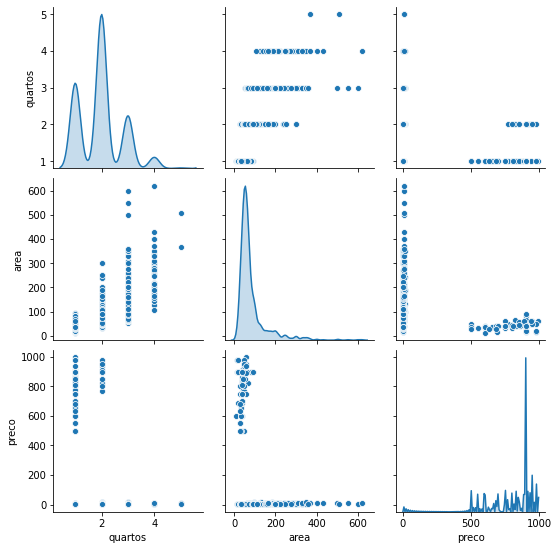

In [21]:
# Distplot
colunas = df[['quartos', 'area', 'preco']]
sns.pairplot(data=colunas, diag_kind='kde')
plt.show()

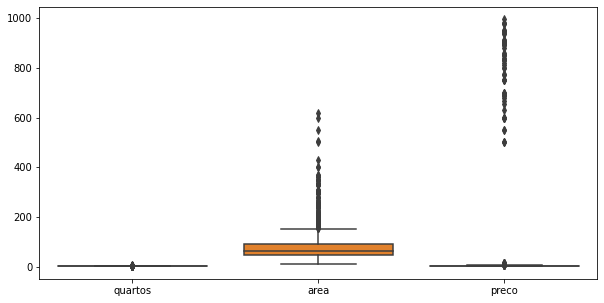

In [25]:
# Boxplot
fig = plt.figure(figsize=(10,5))
colunas = df[['quartos', 'area', 'preco']]
sns.boxplot(data=colunas)
plt.show()